In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,NaN,NaN,0.13,0.5,0.0,NaN,NaN
1,0.43,NaN,NaN,0.27,0.5,0.0,NaN,NaN
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,NaN,NaN,0.54,0.5,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,NaN,NaN,0.5,0.0,0.50,NaN
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,NaN,NaN,NaN,0.5,0.0,NaN,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	148
float64		column 2	519
float64		column 3	519
float64		column 4	445
float64		column 5	0
float64		column 6	0
float64		column 7	444
float64		column 8	297


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1336.000000,965.000000,965.000000,1039.000000,1484.000000,1484.000000,1040.000000,1187.000000
mean,0.499034,0.496280,0.501948,0.262926,0.504717,0.007500,0.498375,0.275838
std,0.136393,0.121427,0.088431,0.138532,0.048351,0.075683,0.058400,0.106900
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.160000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.560000,0.560000,0.330000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

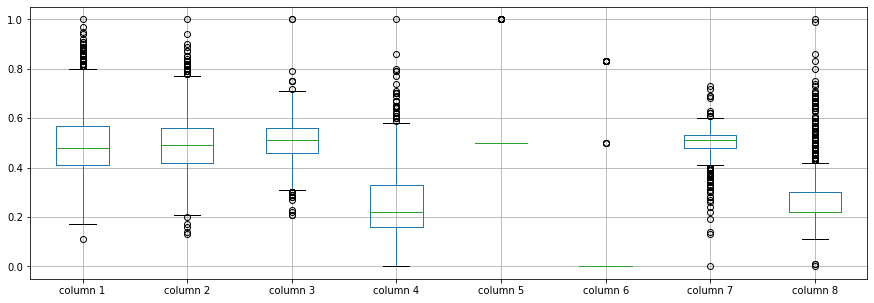

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499034
column 2    0.496280
column 3    0.501948
column 4    0.262926
column 5    0.504717
column 6    0.007500
column 7    0.498375
column 8    0.275838
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.564636,-0.154627,0.140601,0.041350,-0.004319,0.086526,-0.084892
column 2,0.564636,1.000000,-0.266576,0.125278,0.030793,-0.005584,0.089248,-0.059995
column 3,-0.154627,-0.266576,1.000000,0.066308,-0.030083,0.008963,-0.169427,-0.021525
column 4,0.140601,0.125278,0.066308,1.000000,-0.034465,0.000003,-0.095338,-0.049621
column 5,0.041350,0.030793,-0.030083,-0.034465,1.000000,-0.009674,0.034746,0.014804
column 6,-0.004319,-0.005584,0.008963,0.000003,-0.009674,1.000000,0.007111,-0.031482
column 7,0.086526,0.089248,-0.169427,-0.095338,0.034746,0.007111,1.000000,0.055967
column 8,-0.084892,-0.059995,-0.021525,-0.049621,0.014804,-0.031482,0.055967,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+18,8+18+18,8+18+18+18,8+18+18+18+18,8+18+18+18+18+18,8+18+18+18+18+18+18,8+18+18+18+18+18,8+18+18+18+18,8+18+18+18,8+18+18,8+18,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.375344676815945
Epoch: 1 , loss: 2.0923223806464155
Epoch: 2 , loss: 1.8887684228627577
Epoch: 3 , loss: 1.7494270153667615
Epoch: 4 , loss: 1.6352026073828987
Epoch: 5 , loss: 1.5437795169975446
Epoch: 6 , loss: 1.4729133650012638
Epoch: 7 , loss: 1.4109260388042615
Epoch: 8 , loss: 1.3194263875484467
Epoch: 9 , loss: 1.3052250133908314
Epoch: 10 , loss: 1.2390684589095737
Epoch: 11 , loss: 1.1913925487062205
Epoch: 12 , loss: 1.1567110788563024
Epoch: 13 , loss: 1.117721139088921
Epoch: 14 , loss: 1.1190422514210576
Epoch: 15 , loss: 1.0757404053988664
Epoch: 16 , loss: 1.0452298515516778
Epoch: 17 , loss: 1.0515204246925272
Epoch: 18 , loss: 1.0279991710963456
Epoch: 19 , loss: 1.009824285040731
Epoch: 20 , loss: 1.0122936614181683
Epoch: 21 , loss: 0.9944470570139263
Epoch: 22 , loss: 0.9940476585989413
Epoch: 23 , loss: 0.9591157073559968
Epoch: 24 , loss: 0.9670797440668811
Epoch: 25 , loss: 0.9

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,-0.169427,-0.017680,0.000000,0.0,0.0,-0.024689,0.032099
1,0.0,-0.158725,0.039505,0.000000,0.0,0.0,-0.010559,0.058702
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.088221,0.051074,0.000000,0.0,0.0,0.047193,0.068792
...,...,...,...,...,...,...,...,...
1479,0.0,-0.224886,-0.061503,0.040085,0.0,0.0,0.000000,0.012402
1480,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1481,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1482,0.0,0.006030,-0.155480,-0.006194,0.0,0.0,-0.124400,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.788117344759169, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.16604326875466668

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.657105
column 3    0.666143
column 4    0.332441
column 5    0.500000
column 6    0.000000
column 7    0.666365
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.440573,0.452320,0.130000,0.5,0.0,0.455311,0.252099
1,0.43,0.511275,0.519505,0.270000,0.5,0.0,0.519441,0.278702
2,0.64,0.620000,0.490000,0.150000,0.5,0.0,0.530000,0.220000
3,0.58,0.440000,0.570000,0.130000,0.5,0.0,0.540000,0.220000
4,0.42,0.528221,0.531074,0.540000,0.5,0.0,0.527193,0.288792
...,...,...,...,...,...,...,...,...
1479,0.82,0.405114,0.408497,0.220085,0.5,0.0,0.500000,0.232402
1480,0.35,0.290000,0.460000,0.140000,0.5,0.0,0.540000,0.660000
1481,0.41,0.470000,0.500000,0.140000,0.5,0.0,0.530000,0.370000
1482,0.51,0.456030,0.464520,0.243806,0.5,0.0,0.465600,0.220000


In [20]:
imputations[-1].to_excel("Yeast_AE_20(imp).xlsx", index=False, header=False)